# Evaluation of Segmented Linear Regression

---

### Import Libraries

In [1]:
import sys
import os
root = os.path.abspath('..')  
sys.path.append(root)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from piecewise_regression import r_squared_calc


from modules import load, plots, analysis, utils

# styles
plt.style.use('seaborn-v0_8-white')

---

### Load data

In [2]:
# Inputs
name = 'BW5D_YSI_20230822'

In [3]:
path_json = f'../data/results/{name}_results.json'

df = load.load_data(filepath=path_json, json=True)
df


,trial_1,trial_2,trial_3,trial_4,trial_5
df,"{'bic': {'0': 93804.3535159611, '1': 89367.769...","{'bic': {'0': 93804.3535159611, '1': 89367.769...","{'bic': {'0': 93804.3535159611, '1': 89367.769...","{'bic': {'0': 93804.3535159611, '1': 89367.769...","{'bic': {'0': 93804.3535159611, '1': 89367.769..."
best_n_breakpoint_bic,2,2,2,2,2
min_bic_n_breakpoint,10,8,10,9,9
best_n_breakpoint_rss,2,2,2,2,2


In [4]:
path_processed = f'../data/processed/{name}_processed.csv'

x_processed, y_processed = load.load_data(filepath=path_processed, 
                            x_col='Vertical Position [m]',
                            y_col='Corrected sp Cond [uS/cm]'
                            )

---

### Optimal `n_breakpoint`

In [5]:
trial = analysis.select_best_trial(path_json)

trial_select = df[trial[0]]
N_BREAKPOINT = df.loc['best_n_breakpoint_bic'].mode().iloc[0] # alternative, select 'best_n_breakpoint_rss'

In [6]:
# Elbow plot

x_values = np.array(list(trial_select['df']['n_breakpoints'].values()))
y_values = np.array(list(trial_select['df']['bic'].values()))
secondary_x = np.array(list(trial_select['df']['n_breakpoints'].values()))
secondary_y = np.array(list(trial_select['df']['rss'].values()))

plots.plot_data(
    x_values=x_values,
    y_values=y_values,
    plot_mode='lines+markers',
    x_axis_label="Number Breakpoints",
    y_axis_label="BIC",
    secondary_x=secondary_x,
    secondary_y=secondary_y,
    use_secondary_axis=True,
    y2_axis_label="RSS",
    trace_names=['BIC', 'RSS']
)

---

### Evaluation

In [ ]:
# Params
params_ms = utils.get_breakpoint_data(trial_select['df'], N_BREAKPOINT)
params_ms

{'bic': 54709.0191308535,
 'n_breakpoints': 10,
 'estimates': {'const': {'estimate': 1320.8844336362,
   'se': 31.6982841314,
   'confidence_interval': [1258.7422623889, 1383.0266048835],
   't_stat': 41.6705342208,
   'p_t': 0.0},
  'beta1': {'estimate': -4701.321304967,
   'se': 72.3233615973,
   'confidence_interval': [-4843.1059739078, -4559.5366360261],
   't_stat': -65.0041867681,
   'p_t': '-'},
  'breakpoint1': {'estimate': 0.8624141556,
   'se': 0.0090882927,
   'confidence_interval': [0.8445972214, 0.8802310897000001],
   't_stat': '-',
   'p_t': '-'},
  'beta2': {'estimate': 583.0287996452,
   'se': 11.4103977423,
   'confidence_interval': [560.6595481248, 605.3980511656],
   't_stat': 51.0962731375,
   'p_t': '-'},
  'breakpoint2': {'estimate': 4.7235904303,
   'se': 0.0411931343,
   'confidence_interval': [4.6428342987, 4.8043465619],
   't_stat': '-',
   'p_t': '-'},
  'beta3': {'estimate': 1047.4050597726,
   'se': 10.4628111645,
   'confidence_interval': [1026.893482539

In [8]:
# Model Select
ms = utils.rebuild_model(x_processed,y_processed,params_ms)
ms

In [9]:
# Globals
RSS, TSS, R2, R2_ajus = r_squared_calc.get_r_squared(y_processed, 
                                                    ms.predict(x_processed), 
                                                    len(ms.get_params()))


print("RSS: ", RSS)
print("TSS: ", TSS)
print("R2: ", R2)
print("R2_ajus: ", R2_ajus)

RSS:  205086510.44932663
TSS:  2401800866773.062
R2:  0.9999146113596317
R2_ajus:  0.9999140602496899


In [10]:
# Per segment
metric_per_segment = analysis.calculate_metrics_per_segment(ms)
metric_per_segment

[{'Segment': 1,
  'R^2': np.float64(0.970097539492035),
  'RMS%': np.float64(8.977163775353123),
  'RMS% (min-max)': np.float64(5.729951358803509)},
 {'Segment': 2,
  'R^2': np.float64(0.3336733918517537),
  'RMS%': np.float64(1.4371513269659204),
  'RMS% (min-max)': np.float64(18.10127703893856)},
 {'Segment': 3,
  'R^2': np.float64(0.8999876908749999),
  'RMS%': np.float64(3.307154660800106),
  'RMS% (min-max)': np.float64(10.148567539921848)},
 {'Segment': 4,
  'R^2': np.float64(0.9726592539469645),
  'RMS%': np.float64(3.1480510477407866),
  'RMS% (min-max)': np.float64(4.042642340971493)},
 {'Segment': 5,
  'R^2': np.float64(0.9818789734360508),
  'RMS%': np.float64(2.44097758876971),
  'RMS% (min-max)': np.float64(4.6731847832862865)},
 {'Segment': 6,
  'R^2': np.float64(0.9898922318159985),
  'RMS%': np.float64(1.0039339080143448),
  'RMS% (min-max)': np.float64(2.74628930562775)},
 {'Segment': 7,
  'R^2': np.float64(0.9953687787721557),
  'RMS%': np.float64(0.5400763835011204),

In [11]:
# Breakpoints
breakpoints = analysis.extract_breakpoints(ms)
breakpoints

,Breakpoint X Position,Breakpoint Y Position,Confidence Interval (X)
0,0.862414,5415.440714,"(0.8445972214051135, 0.8802310897477718)"
1,4.723590,5594.842045,"(4.642834298702246, 4.804346561908773)"
2,8.120192,7732.974460,"(8.077859044268884, 8.162525025778255)"
3,12.538199,15141.515816,"(12.532650454484996, 12.54374745693835)"
4,13.317174,27819.894056,"(13.305811096238026, 13.328536395483157)"
5,14.624946,39491.945204,"(14.60366033415171, 14.646231289315937)"
6,16.624618,51203.214120,"(16.61299945128196, 16.63623662946865)"
7,19.263391,53871.410304,"(19.19377623626818, 19.333005167233576)"
8,23.622338,54784.705114,"(23.43778355298057, 23.806892702631487)"
9,32.131722,54756.754553,"(31.75187083497752, 32.51157346880797)"


##

---

### Final results

#### General models

In [12]:
# Visualizamos los datos procesados junto con los modelos obtenidos
df_ms = pd.DataFrame({'n_breakpoints': trial_select['df']['n_breakpoints'], 
                    'estimates': trial_select['df']['estimates']})

plots.interactive_segmented_regression(x=x_processed, y=y_processed, df=df_ms)

interactive(children=(IntSlider(value=0, description='n_breakpoints', max=10), Output()), _dom_classes=('widge…

#### Models per segment

In [13]:
segments = utils.extract_segments(ms)   
segments

{'segments': [{'segment': 1,
   'data_x': array([0.001, 0.009, 0.014, 0.019, 0.032, 0.038, 0.043, 0.049, 0.064,
          0.07 , 0.076, 0.09 , 0.096, 0.1  , 0.112, 0.117, 0.12 , 0.129,
          0.133, 0.135, 0.145, 0.15 , 0.154, 0.158, 0.166, 0.168, 0.17 ,
          0.177, 0.18 , 0.183, 0.193, 0.196, 0.199, 0.208, 0.213, 0.214,
          0.218, 0.219, 0.22 , 0.221, 0.224, 0.227, 0.229, 0.232, 0.233,
          0.234, 0.235, 0.236, 0.237, 0.238, 0.239, 0.24 , 0.241, 0.242,
          0.243, 0.244, 0.245, 0.246, 0.247, 0.25 , 0.251, 0.253, 0.258,
          0.265, 0.274, 0.282, 0.284, 0.286, 0.288, 0.289, 0.29 , 0.293,
          0.295, 0.297, 0.298, 0.299, 0.302, 0.308, 0.322, 0.328, 0.332,
          0.346, 0.351, 0.354, 0.367, 0.376, 0.385, 0.402, 0.409, 0.414,
          0.423, 0.44 , 0.448, 0.454, 0.47 , 0.476, 0.478, 0.492, 0.499,
          0.505, 0.512, 0.526, 0.532, 0.54 , 0.553, 0.556, 0.564, 0.57 ,
          0.576, 0.581, 0.585, 0.597, 0.603, 0.607, 0.611, 0.621, 0.626,
          0.

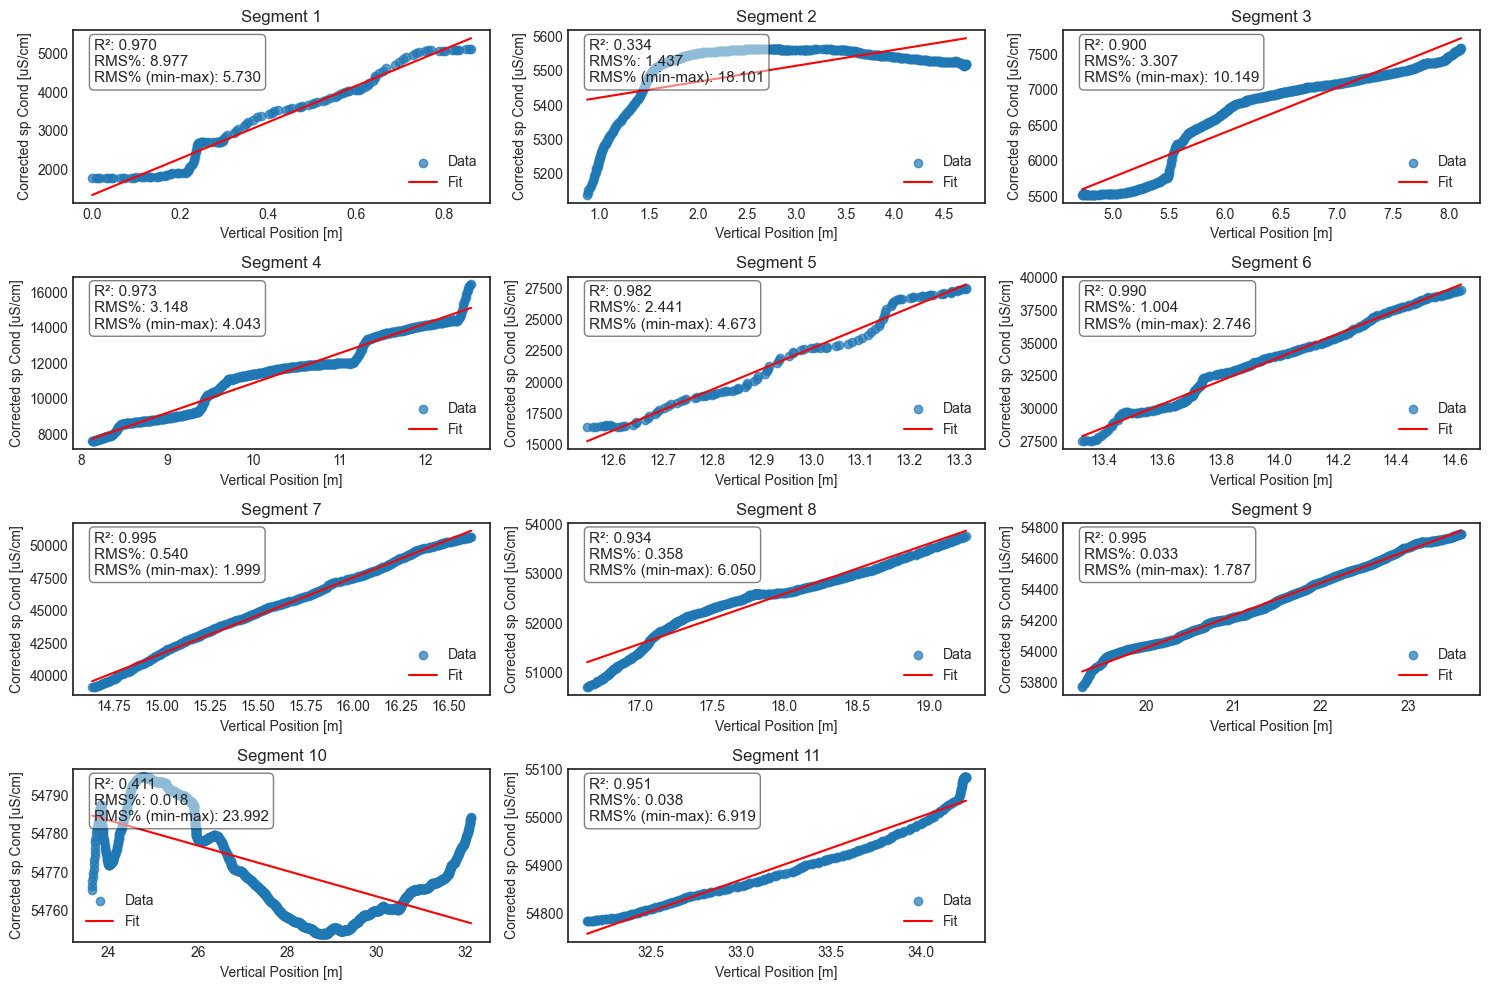

In [14]:
plots.plot_segments(segments, metric_per_segment)

---

## Other analysis

### 1. Density of points in processed data


In [15]:
width = 1 # meters

density = analysis.calculate_density(x_processed, y_processed, bin_width=width)

In [16]:
# Graficar densidad
plots.plot_histogram(density,
            value_column='x_bin', 
            weight_column='frequency', 
            num_bins=len(density['x_bin']),
            title=f'Densidad de datos a {width} metro(s)',
            x_axis_title='Vertical Position [m]',
            bar_color='lightgreen'
            ) 